In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  2 19:06:34 2020

@author: nacho

crear para todos los estados dataset con diccionario

"""
#%%
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns; sns.set()
from scipy import stats
from matplotlib import pyplot as plt
sns.set(color_codes=True)
import os, datetime
from collections import Counter
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as ticker
from darts import TimeSeries
from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    StandardRegressionModel,
    Theta,
    FFT
)
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)
import statsmodels.api as sm
from itertools import product
import math
from sklearn.preprocessing import MinMaxScaler
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

In [4]:
path = "/home/nacho/Documents/coronavirus/Data_Mexico"
os.chdir(os.path.join(path)) 
delitos_df = pd.read_csv("data/IDEFC_NM_dic2020.csv", encoding='latin-1',thousands=',')
#delitos_df = pd.read_csv("data/IDEFC_NM_mar2021.csv", encoding='latin-1',thousands=',')
#movilidad = movilidad.return_df()
df_movilidad = pd.read_csv("data/google_movilidad.csv", index_col='Date')


In [9]:
delitos_df.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2,1,2,2,2,1
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0,1,0,0,0,1
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
df_movilidad.head()

,Unnamed: 0,State,Residences
Date,,,
2020-02-16,2667462,NaN,-1.0
2020-02-17,2667463,NaN,-2.0
2020-02-18,2667464,NaN,-2.0
2020-02-19,2667465,NaN,-1.0
2020-02-20,2667466,NaN,-1.0


In [5]:
########################
#########ESTADOS########
########################

In [6]:
#%%hacer listas de valores unicos 
dict_delitos_sum = {}
states = delitos_df.Entidad.value_counts().index.tolist()
delitos_list = delitos_df['Tipo de delito'].value_counts().index.tolist()


In [11]:
delitos_list

['Robo',
 'Homicidio',
 'Lesiones',
 'Secuestro',
 'Feminicidio',
 'Extorsión',
 'Otros delitos que atentan contra la libertad y la seguridad sexual',
 'Otros delitos contra la familia',
 'Rapto',
 'Falsedad',
 'Incumplimiento de obligaciones de asistencia familiar',
 'Incesto',
 'Violencia familiar',
 'Otros delitos que atentan contra la vida y la integridad corporal',
 'Despojo',
 'Aborto',
 'Delitos cometidos por servidores públicos',
 'Tráfico de menores',
 'Otros delitos del Fuero Común',
 'Abuso de confianza',
 'Otros delitos que atentan contra la libertad personal',
 'Contra el medio ambiente',
 'Trata de personas',
 'Violación simple',
 'Narcomenudeo',
 'Otros delitos contra la sociedad',
 'Otros delitos contra el patrimonio',
 'Falsificación',
 'Violación equiparada',
 'Acoso sexual',
 'Fraude',
 'Daño a la propiedad',
 'Evasión de presos',
 'Hostigamiento sexual',
 'Corrupción de menores',
 'Abuso sexual',
 'Amenazas',
 'Electorales',
 'Allanamiento de morada',
 'Violencia de

In [12]:
#%%Generar dict de delitos por estado 
for state in states:
    delitos_state = delitos_df[delitos_df['Entidad'] == state]
    delitos_sum_df = pd.DataFrame(index = pd.date_range('2015-01', '2021-01', freq='M'))
    #delitos_sum_df = pd.DataFrame(index = pd.date_range('2015-01', '2021-04', freq='M'))
    delitos_sum_df.index.name = 'date'
    years = np.arange(2015,2021)
    #years = np.arange(2015,2022)
    meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    for delito in delitos_list:
        values_delito = []
        for year in years:
            for mes in meses:
                value = delitos_state.loc[(delitos_state['Tipo de delito'] == delito) & (delitos_state['Año'] == year), mes].sum()
                values_delito.append(value)
        delitos_sum_df[str(delito)] = values_delito
        dict_delitos_sum[state] = delitos_sum_df

In [16]:
dict_delitos_sum['Colima']['Robo']

date
2015-01-31    188
2015-02-28    209
2015-03-31    213
2015-04-30    200
2015-05-31    213
             ... 
2020-08-31    500
2020-09-30    639
2020-10-31    705
2020-11-30    560
2020-12-31    566
Freq: M, Name: Robo, Length: 72, dtype: int64

In [17]:
#%%generar dict con todas las comb de estados y delitos para guardar corr y trend
df_dsct = pd.DataFrame(list(product(states, delitos_list)), columns=['state', 'delito'])
df_dsct['corr'] = ""
df_dsct['trend'] = ""

In [18]:
df_dsct.head()

,state,delito,corr,trend
0,Quintana Roo,Robo,,
1,Quintana Roo,Homicidio,,
2,Quintana Roo,Lesiones,,
3,Quintana Roo,Secuestro,,
4,Quintana Roo,Feminicidio,,


In [19]:
#%%Generar df por delito por estado y su porcentaje de crecimento respecto al año pasado
for state in states:
    for delito in delitos_list:
        df_delito_state = dict_delitos_sum[state].sort_values(['date'])[delito]
        trend = df_delito_state.resample('Y').sum().pct_change()[-1]
        if np.isinf(trend):
            trend = math.inf
        df_dsct.loc[(df_dsct['state'] == state) & (df_dsct['delito'] == delito), ['trend']] = trend

In [20]:
df_dsct.head()

,state,delito,corr,trend
0,Quintana Roo,Robo,,-0.226434
1,Quintana Roo,Homicidio,,-0.0906667
2,Quintana Roo,Lesiones,,-0.0885767
3,Quintana Roo,Secuestro,,-0.541667
4,Quintana Roo,Feminicidio,,-0.0625


In [21]:
#%%corr con moviliad
df_corr_movilidad = df_movilidad[df_movilidad['State'].notna()]
df_corr_movilidad['State'].replace({
    'Nuevo Leon': 'Nuevo León',
    'Mexico City': 'Ciudad de México', 
    'Yucatan':'Yucatán', 
    'Veracruz':'Veracruz de Ignacio de la Llave',
    'San Luis Potosi': 'San Luis Potosí',
    'workplaces_percent_change_from_baseline':'Querétaro',
    'Michoacán': 'Michoacán de Ocampo',
    'State of Mexico':'México',
    'Coahuila': 'Coahuila de Zaragoza'
    },inplace=True)

for state in states:
    for delito in delitos_list:
        df_delito_state = dict_delitos_sum[state].sort_values(['date'])[delito]
        movilidad_spec = df_corr_movilidad.loc[(df_corr_movilidad['State'] == state) & (df_corr_movilidad.index > '2020-02-15') & (df_corr_movilidad.index < '2021-01-01')]
        movilidad_spec.index = pd.to_datetime(movilidad_spec.index)
        movilidad_spec = movilidad_spec['Residences'].resample('M').sum()
        df_delito_state = df_delito_state.loc['2020-02':]
        corr = stats.pearsonr(movilidad_spec, df_delito_state)[0]
        df_dsct.loc[(df_dsct['state'] == state) & (df_dsct['delito'] == delito), ['corr']] = corr


In [22]:
df_dsct.head()

,state,delito,corr,trend
0,Quintana Roo,Robo,-0.894344,-0.226434
1,Quintana Roo,Homicidio,-0.515873,-0.0906667
2,Quintana Roo,Lesiones,-0.662067,-0.0885767
3,Quintana Roo,Secuestro,-0.129394,-0.541667
4,Quintana Roo,Feminicidio,-0.353383,-0.0625


In [23]:
#%%Limpiar df
df_dsct.drop(df_dsct[df_dsct['trend'] == "inf"].index, inplace = True)
df_dsct.drop(df_dsct[df_dsct['trend'] == "nan"].index, inplace = True)
df_dsct.drop(df_dsct[df_dsct['corr'] == "inf"].index, inplace = True)
df_dsct.drop(df_dsct[df_dsct['corr'] == "nan"].index, inplace = True)
df_dsct = df_dsct[pd.notnull(df_dsct['trend'])]
df_dsct = df_dsct[pd.notnull(df_dsct['corr'])]
#drop index
df_dsct = df_dsct.sort_values(by=['corr'],ignore_index=True, ascending = False)

In [27]:
df_dsct

,state,delito,corr,trend
0,Baja California,Trata de personas,0.722332,1.84211
1,México,Violencia de género en todas sus modalidades d...,0.67381,0.387029
2,Jalisco,Aborto,0.671945,1.6
3,México,Violencia familiar,0.64436,0.828846
4,México,Otros delitos que atentan contra la vida y la ...,0.637117,0.270175
...,...,...,...,...
1101,Ciudad de México,Lesiones,-0.938674,-0.276884
1102,Ciudad de México,Robo,-0.945753,-0.287597
1103,Oaxaca,Robo,-0.953576,-0.213563
1104,Ciudad de México,Abuso sexual,-0.957185,-0.229953


In [25]:
#%%specific scaler
def spec_scaler(series, minv, maxv):
    series = series.values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(minv, maxv))
    scaler = scaler.fit(series)
    normalized_series = scaler.transform(series)
    return normalized_series
#%%prediction
def predict_series(df_delito_state, delito):
    df_pred = df_delito_state.copy()
    df_pred = pd.DataFrame(df_pred)
    
    df_pred['Year'] = pd.date_range('2015-01', '2021-01', freq='M')
    series = TimeSeries.from_dataframe(df_pred, 'Year', delito)
    #train, val = series.split_before(pd.Timestamp('20200201'))
    train, val = series.split_before(pd.Timestamp('20191230'))

    model = Prophet()
    #model = ExponentialSmoothing()
    model.fit(train)
    prediction = model.predict(len(val))
    prediction = prediction.pd_dataframe()
    prediction[prediction < 0] = 0
    return prediction

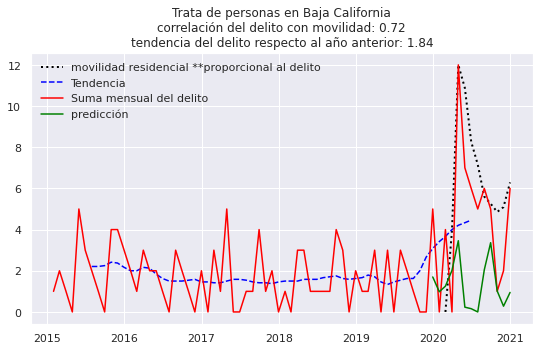

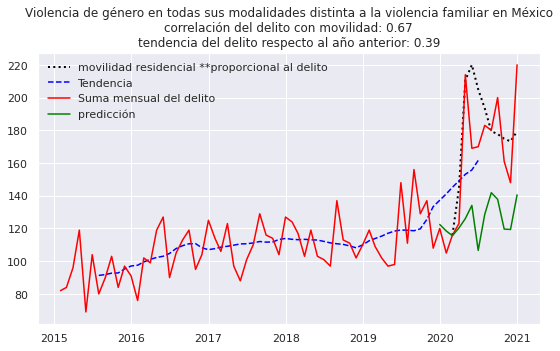

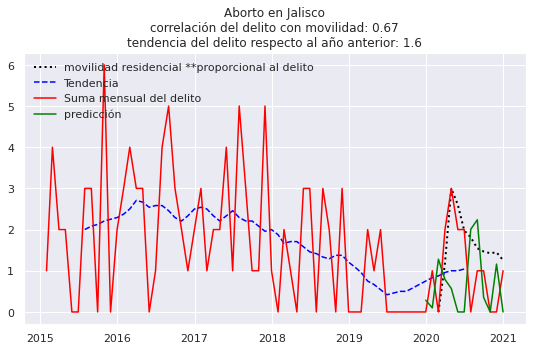

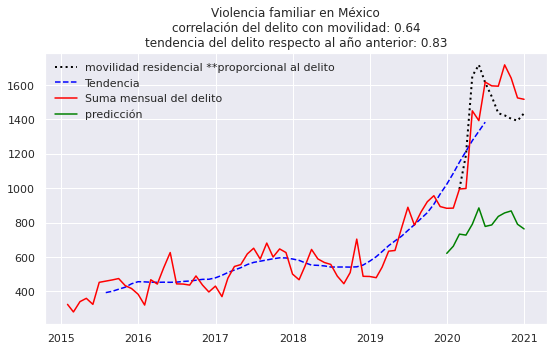

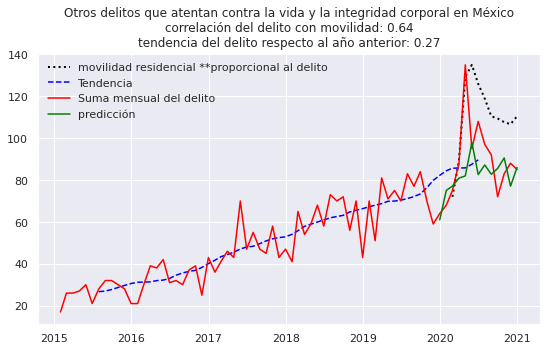

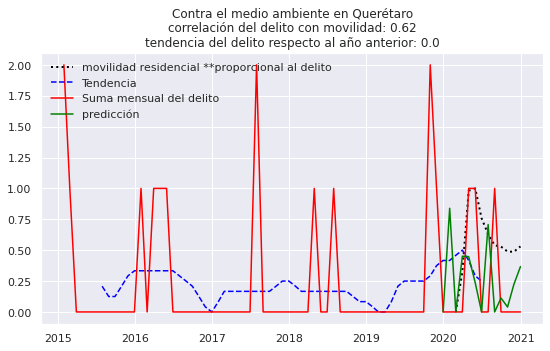

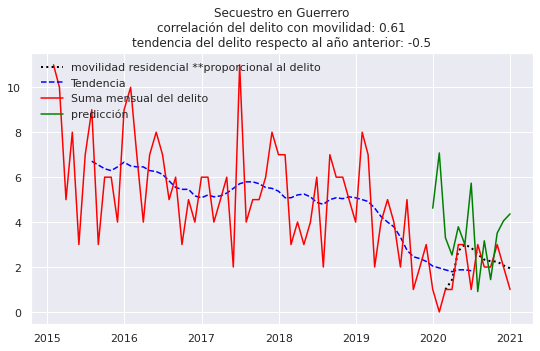

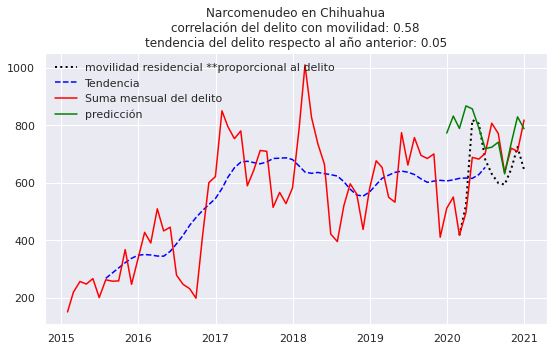

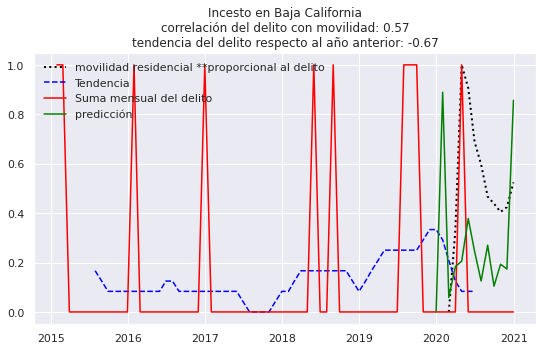

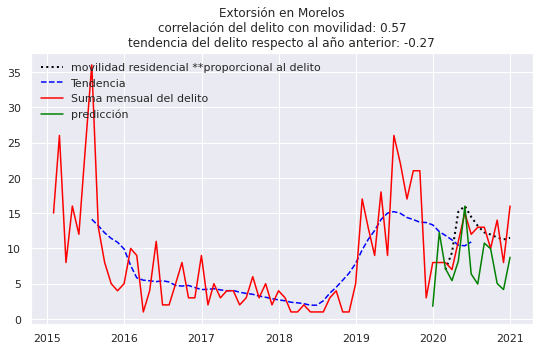

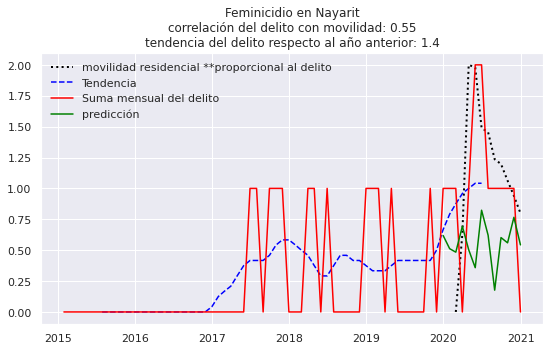

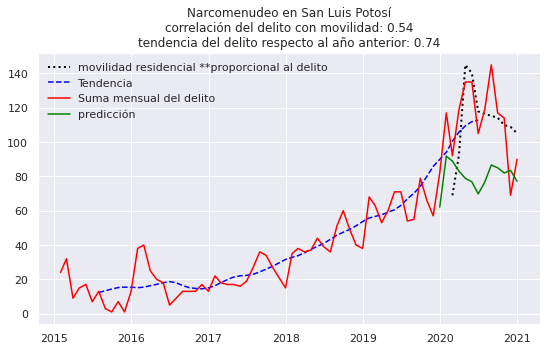

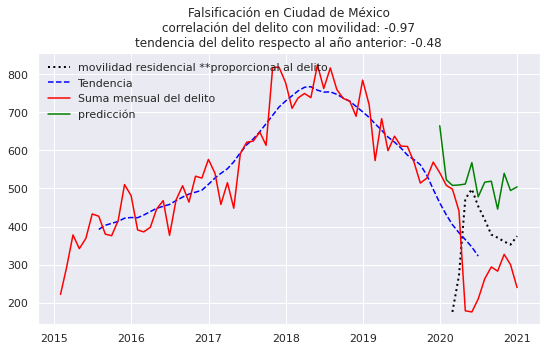

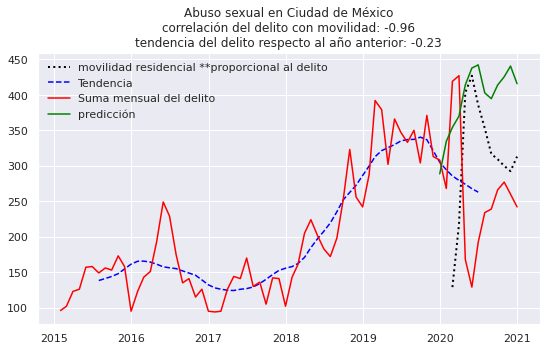

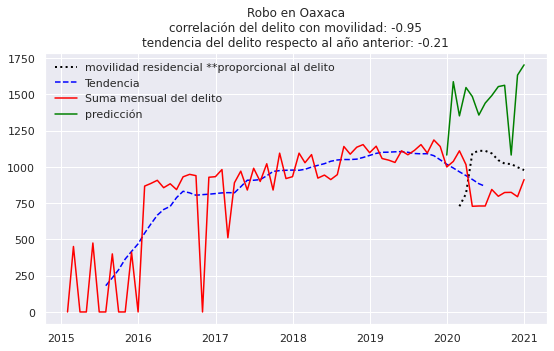

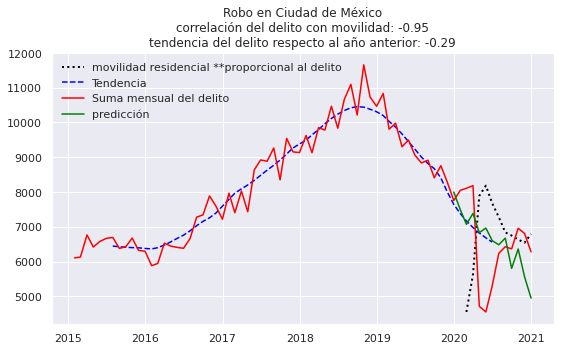

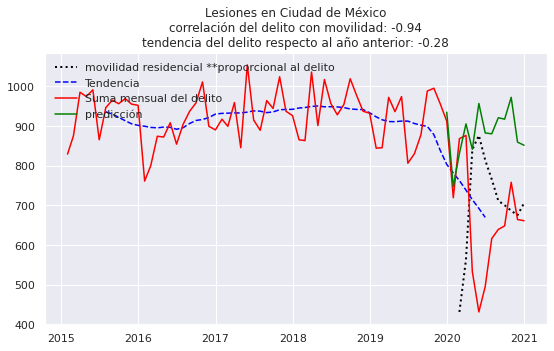

In [26]:
#plot df_dsct
for index in [0,1,2,3,4,5,6,7,8,9,10,11,-1,-2,-3,-4,-5]:
    
    index_delito_state = df_dsct.iloc[index,:]
    state = index_delito_state.loc['state']
    delito = index_delito_state.loc['delito']
    df_delito_state = dict_delitos_sum[state][delito]
    
    decom = sm.tsa.seasonal_decompose(df_delito_state, model = 'additive')
    
    movilidad_spec = df_corr_movilidad.loc[(df_corr_movilidad['State'] == state) & (df_corr_movilidad.index < '2021-01-01')]
    movilidad_spec.index = pd.to_datetime(movilidad_spec.index)
    movilidad_spec = movilidad_spec['Residences'].resample('M').sum()
    #plot
    fig, ax = plt.subplots() 
    ax.plot(movilidad_spec.index, spec_scaler(series = movilidad_spec, 
                                              minv = df_delito_state.loc[df_delito_state.index > '2020-02-15'].resample('M').sum().min(),
                                              maxv = df_delito_state.loc[df_delito_state.index > '2020-02-15'].resample('M').sum().max()),
            label = 'movilidad residencial **proporcional al delito',
            linestyle = ':',
            color = 'black',
            linewidth=2)
    ax.plot(decom.trend.index, decom.trend.values, label = 'Tendencia', linestyle='--', color='blue')
    ax.plot(decom.trend.index, df_delito_state.resample('M').sum(), label = 'Suma mensual del delito', color='red')
    ax.set_title(delito+' en '+state+
                 '\n'+'correlación del delito con movilidad: '+str(round(df_dsct.iloc[index,:]['corr'], 2))+
                 '\n'+'tendencia del delito respecto al año anterior: '+str(round(df_dsct.iloc[index,:]['trend'], 2)))
    df_pred = predict_series(df_delito_state, delito)
    ax.plot(df_pred.index,
            df_pred.values,
            label = 'predicción',
            color = 'green')
    
    ax.legend(loc='upper left')
    plt.plot()